#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

a) Solve analytically for the maximum liklihood of the Poisson distribution.

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

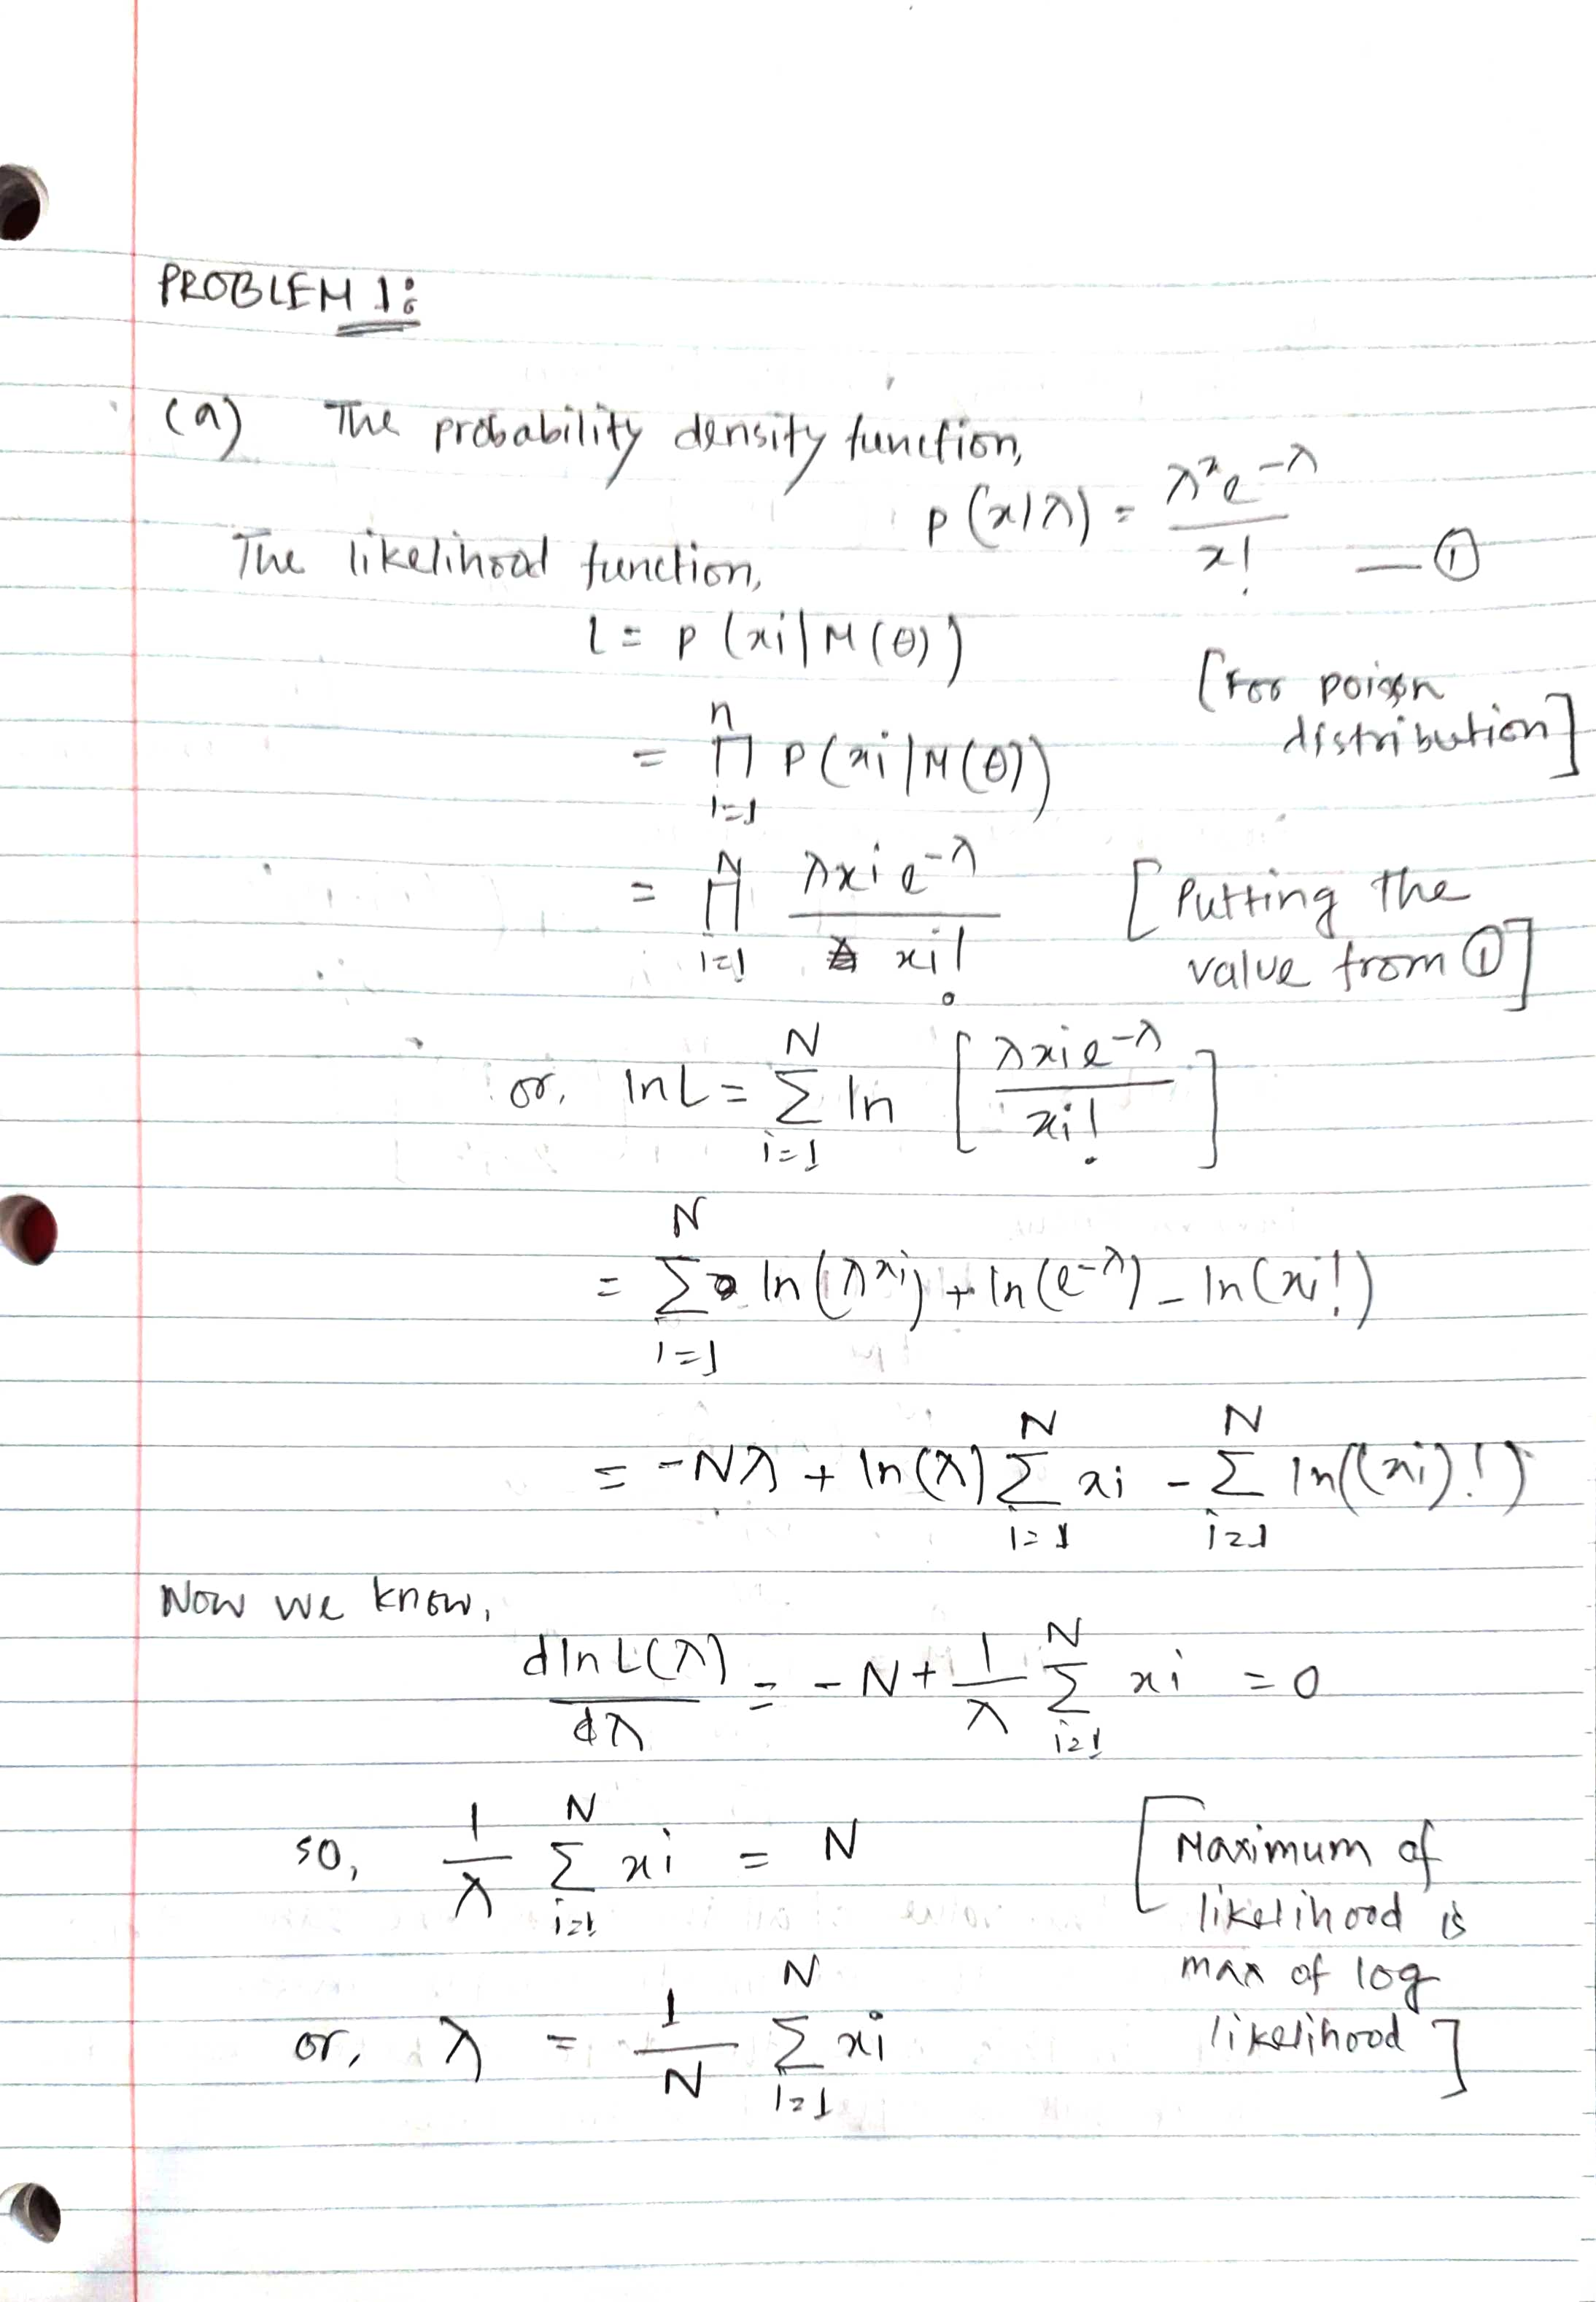

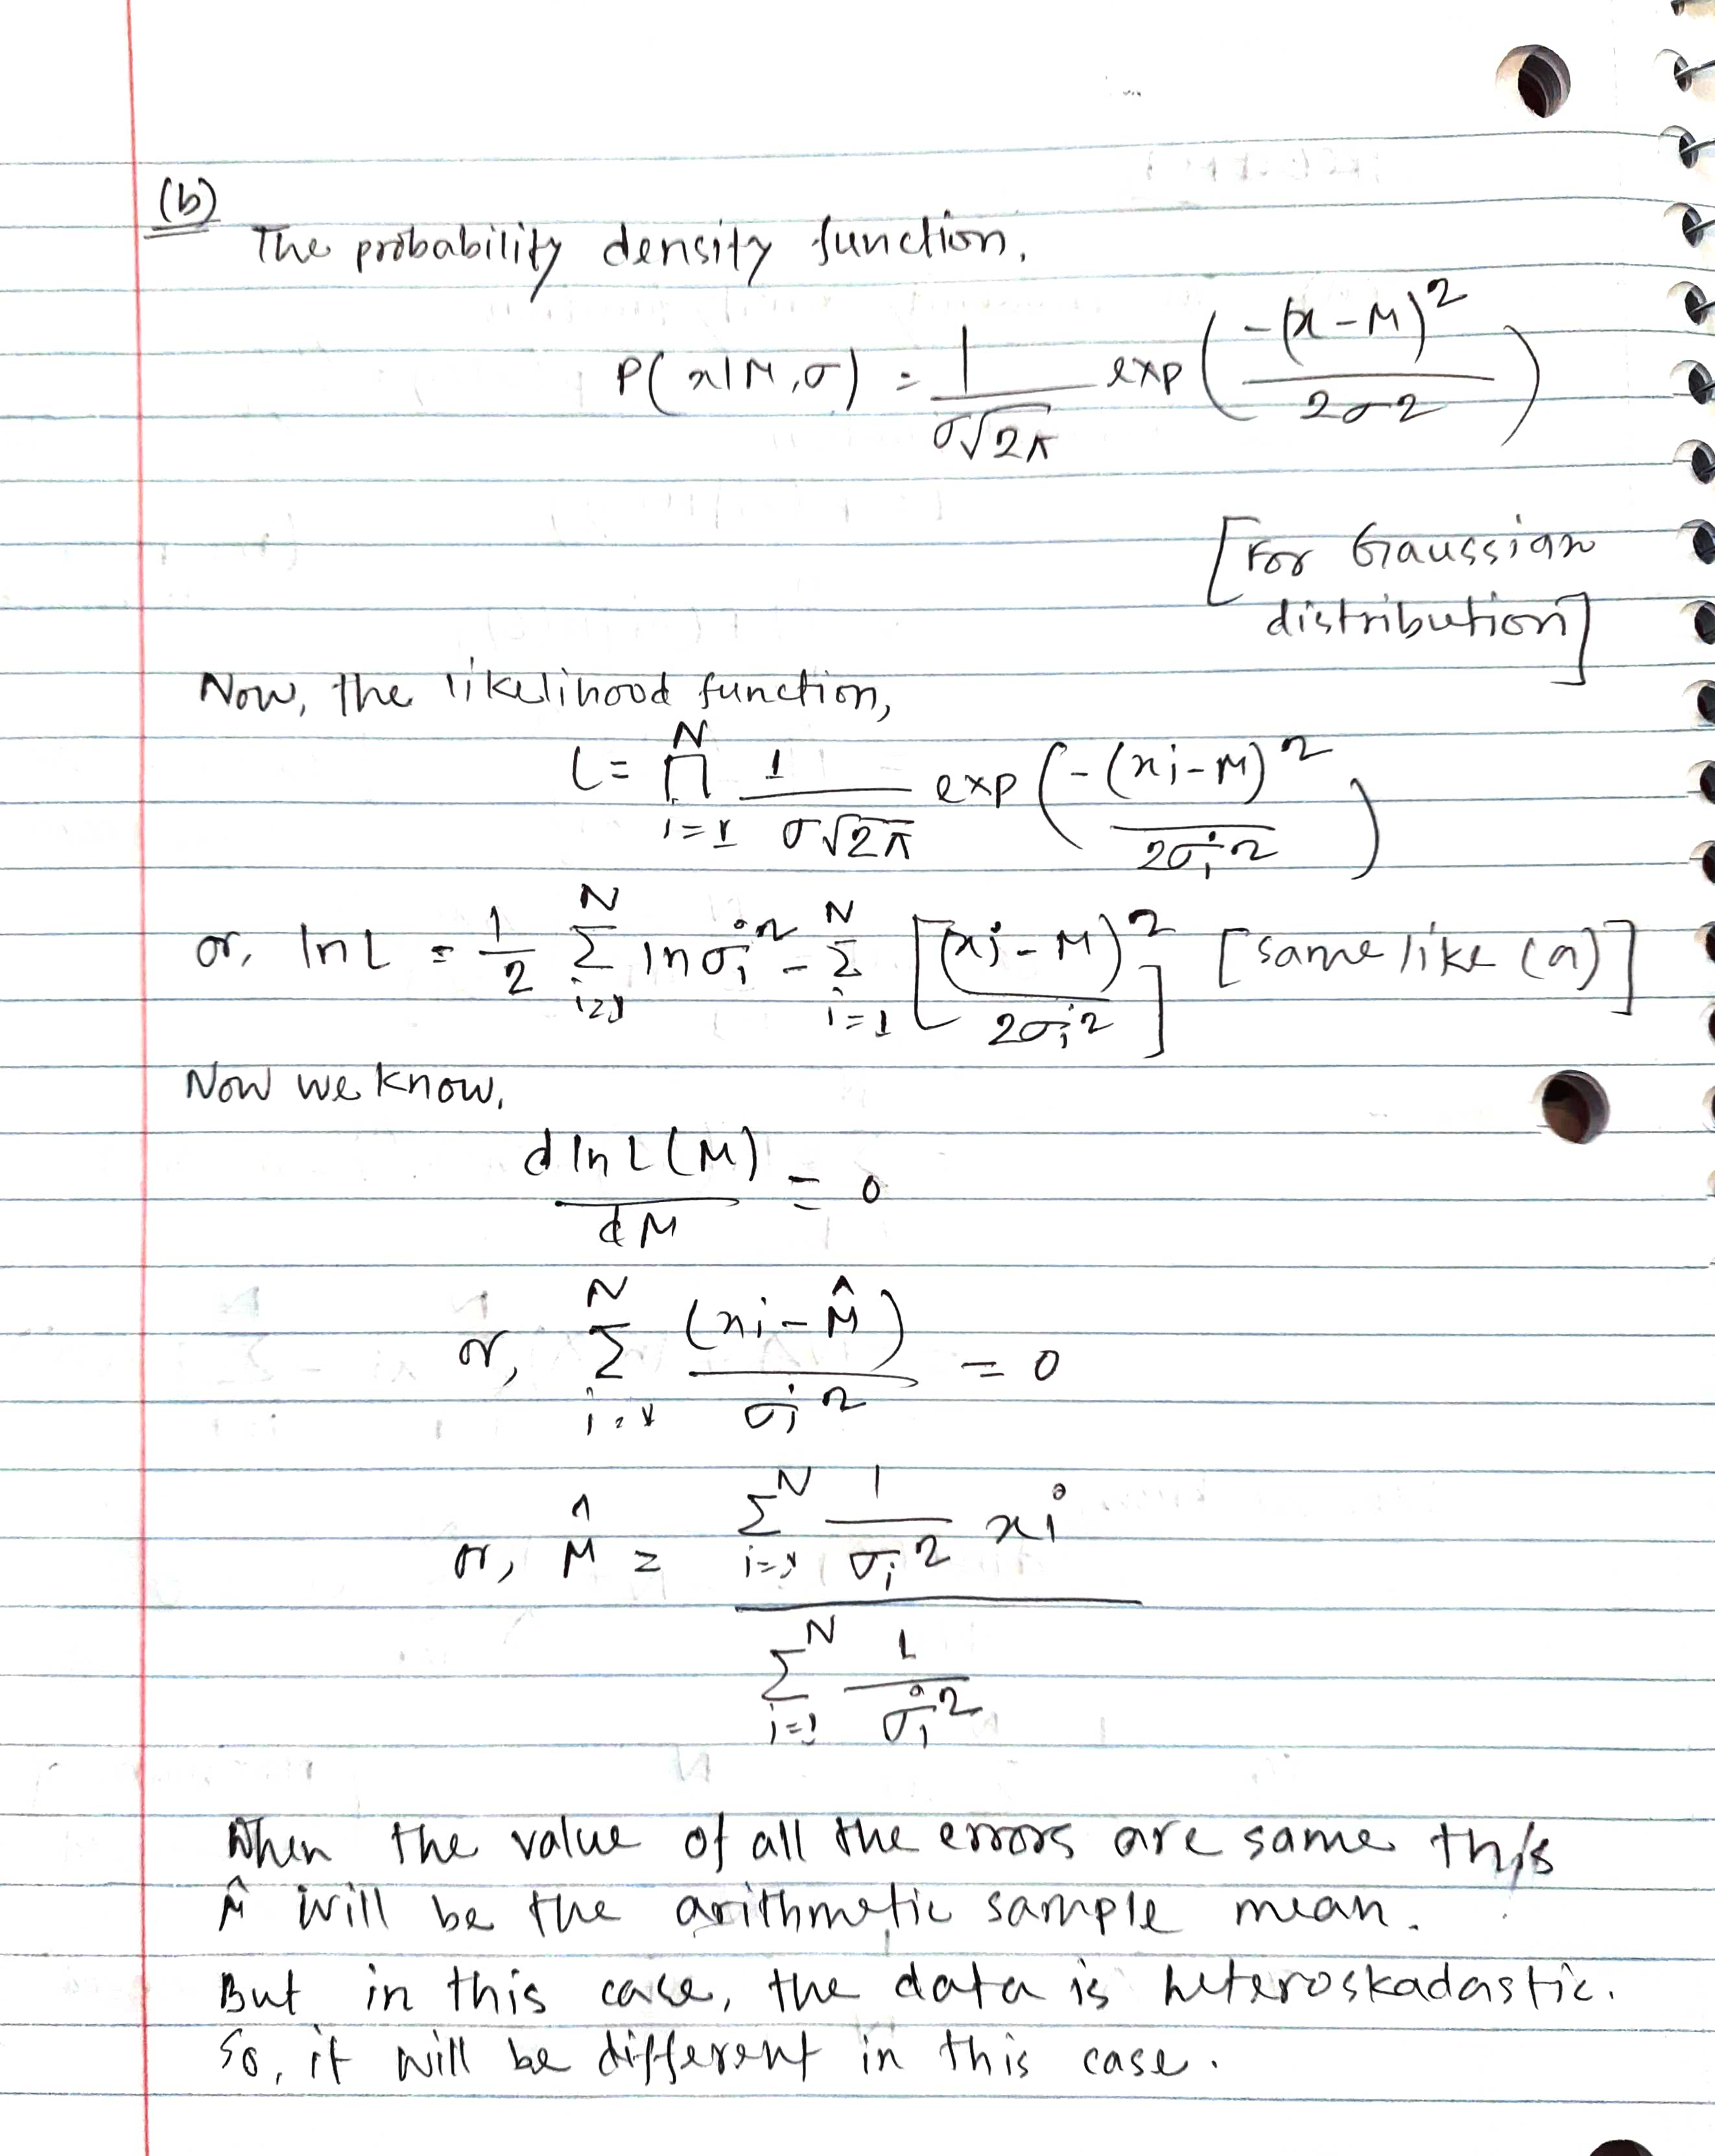

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



In [1]:
# Getting all the necessary tools
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy.stats.mstats import winsorize
from scipy import optimize
from astroML.datasets import fetch_hogg2010test

In [2]:
# Defining two variables x and y
# x call random integers, and y winsorize x
#The limit of winsorization is 0.1 and 0.2 as this is the persecentage of lowest and highest
#                 values that we will replace with 

x = np.random.randint(0, 100, 50)
y = winsorize(x, limits=[0.1, 0.2])

# The 10% of the lowest value are replaced by the next smallest value
# The 20% of the highest values are replaced by the next largest value

# printing x and y
print(x)
print(y)



[96 48 99 38  9 80 22 78 16 29 59  2 90 70 46 44 70 58 98 27 93  3 11 33
  2  8 64 39 21 88 72 91 65 43 90 60 82 72 75 76 42 99 91 92 71 57 65 19
 11 53]
[88 48 88 38 11 80 22 78 16 29 59 11 88 70 46 44 70 58 88 27 88 11 11 33
 11 11 64 39 21 88 72 88 65 43 88 60 82 72 75 76 42 88 88 88 71 57 65 19
 11 53]


Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 85.055557
         Iterations: 78
         Function evaluations: 149


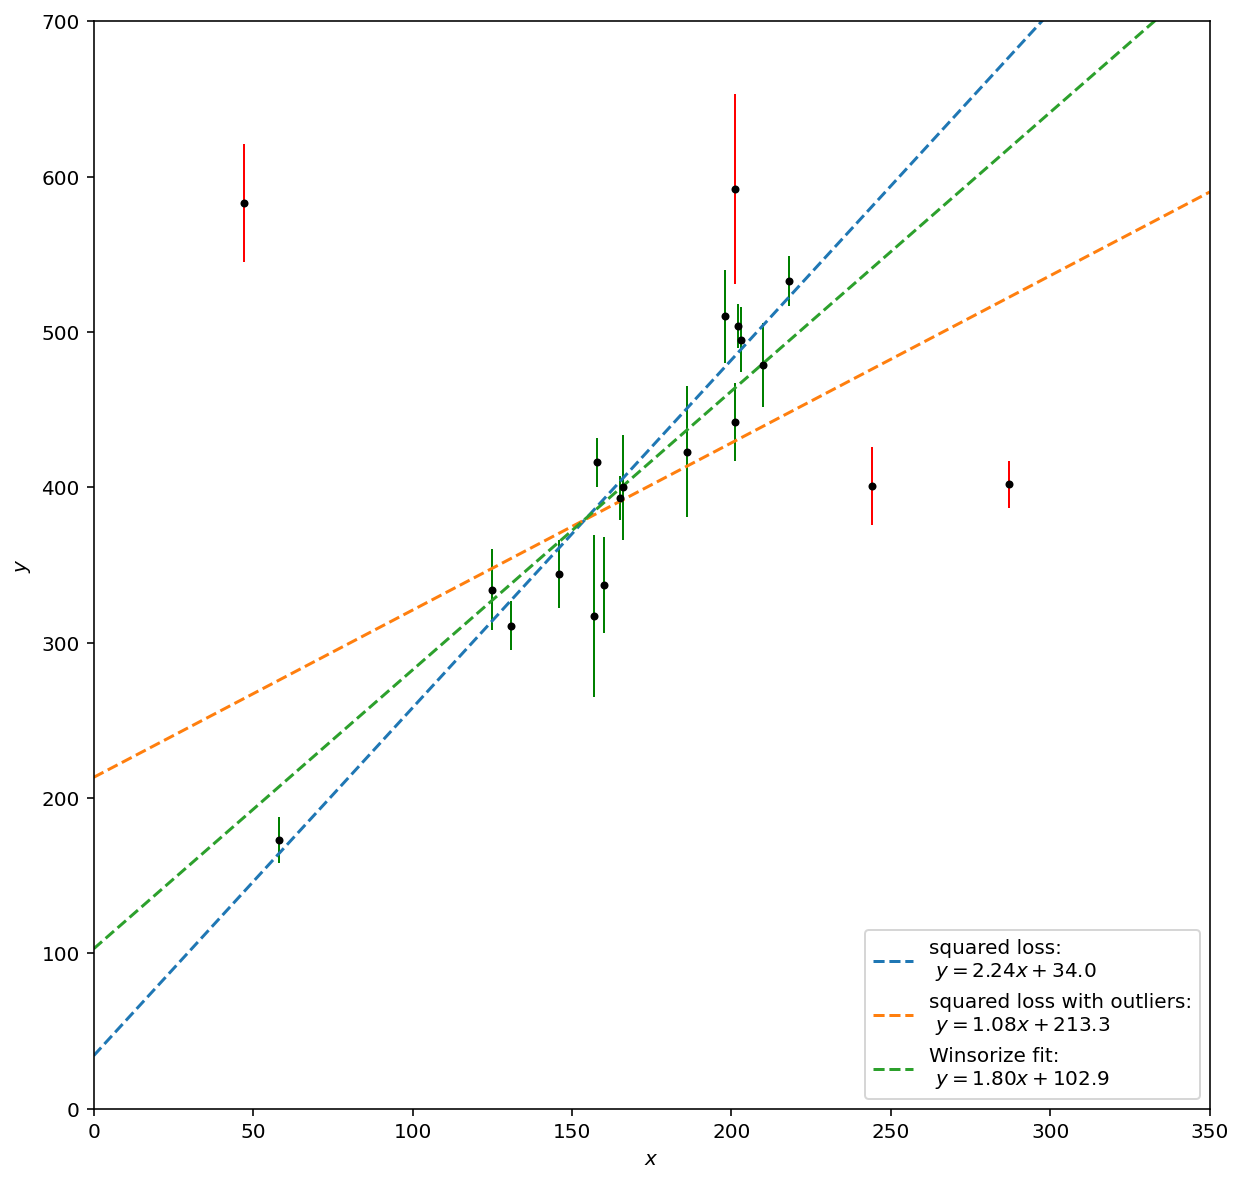

In [9]:
# We will plot the results
data = fetch_hogg2010test()
x = data['x'] 
y = data['y'] 
dy = data['sigma_y']

# Defining function to return squared loss
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

f_squared = lambda beta: squared_loss(beta[0], beta[1], x=x[4:], y=y[4:], dy=dy[4:])

beta0 = (1, 30) # initial guess for a and b
beta_squared = optimize.fmin(f_squared, beta0)

f_squared_outlier = lambda beta_outlier: squared_loss(beta_outlier[0], beta_outlier[1], x=x, y=y, dy=dy)

# We will do a initial guess for a and b
beta0 = (1, 30)
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)

f_squared_winsorize = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=winsorize(x, limits=[0.1, 0.2]), 
                                      y=winsorize(y, limits=[0.1, 0.2]), 
                                      dy=winsorize(dy, limits=[0.1, 0.2]))

beta_squared_winsorize = optimize.fmin(f_squared_winsorize, beta0)


# We will plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Plotting the data without outliers and plotting outliers
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='green')
ax.errorbar(x[0:4], y[0:4], dy[0:4], 
            fmt='.k', lw=1, ecolor='red')


# Plot the regular fit without and with outliers
x_fit = np.linspace(0, 350, 10)
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        ls='--', label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1],
        ls='--', label="squared loss with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))

# PLotting wi
ax.plot(x_fit, beta_squared_winsorize[0] * x_fit + beta_squared_winsorize[1],
        ls='--', label="Winsorize fit:\n $y=%.2fx + %.1f$" % tuple(beta_squared_winsorize))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 350)
ax.set_ylim(0, 700)

ax.legend(loc=4, prop=dict(size=10))